# Visualizing KMeans Clustering Results 

Parallel Coordinate plots are visualizations that allow for the comparison of features of several individual observations on a set of numeric variables. In the case of KMeans clustering, these plots visualize the values of each component and are colored by their respective cluster.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns

In [2]:
#functions from previous notebooks 
from sklearn.cluster import KMeans

#K means Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

In [3]:
def k_means(svd_results,num_clusters,clust_labels,cent):
    clust_labels, cent = doKmeans(svd_results, num_clusters)
    kmeans = pd.DataFrame(clust_labels)
    svd_results.insert((svd_results.shape[1]),'kmeans',kmeans)

In [4]:
def parallel_plot(data):
    parallel_coordinates(data, 'kmeans', colormap=plt.get_cmap("Set2"))
    plt.show()

### Lab KMeans Results Clusters

In [5]:
svdLab_results = pd.read_csv("C:/Users/rachh/OneDrive/Documents/Senior Thesis/svdLab_results.csv")

In [6]:
labClust_labels, lab_cent = doKmeans(svdLab_results)
clust_labels, cent = doKmeans(svdLab_results, 2)
kmeans = pd.DataFrame(clust_labels)
svdLab_results.insert((svdLab_results.shape[1]),'kmeans',kmeans)

In [7]:
#because this function is so memory intensive, I will perform it on a sample of the data
condensedSVD = svdLab_results.sample(10000)

Here is a parallel coordinate plot of the entire dataset

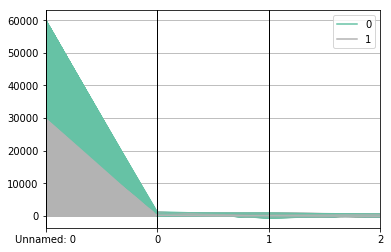

In [8]:
parallel_coordinates(condensedSVD, 'kmeans', colormap=plt.get_cmap("Set2"))

Due to the scales being so different, we will extract the second, third, and fourth columns and plot those on their own. 

In [9]:
svdLab_results.head()

,Unnamed: 0,0,1,2,kmeans
0,0,162.837777,156.232642,-82.422528,1
1,1,342.544976,-55.792360,-29.707457,1
2,2,322.907712,62.526145,-10.552495,1
3,3,390.224672,-27.184199,1.820830,1
4,4,434.144400,26.570006,13.085177,1


In [10]:
svdLab_results2 = svdLab_results[['0','1','2','kmeans']]
condensedLabSVD2 = svdLab_results2.sample(10000)

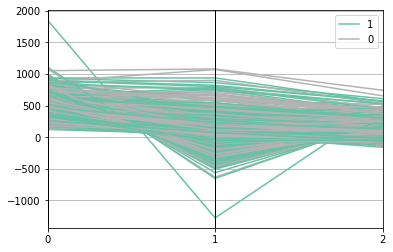

In [11]:
parallel_coordinates(condensedLabSVD2, 'kmeans', colormap=plt.get_cmap("Set2"))

## Master Matrix SVD Results Clusters

In [12]:
mm_results = pd.read_csv("C:/Users/rachh/Downloads/master_matrix.csv")

In [13]:
mmClust_labels, mm_cent = doKmeans(mm_results)
clust_labels, cent = doKmeans(mm_results, 2)
kmeans = pd.DataFrame(clust_labels)
mm_results.insert((mm_results.shape[1]),'kmeans',kmeans)

In [14]:
#because this function is so memory intensive, I will perform it on a sample of the data
mmCondensedSVD = mm_results.sample(10000)

Here is a parallel coordinate plot of the entire dataset

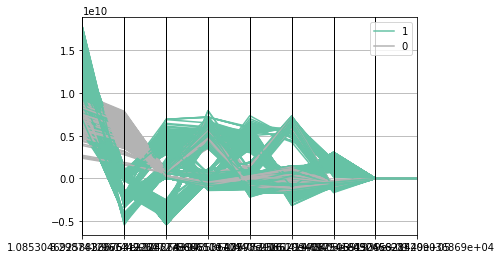

In [15]:
parallel_coordinates(mmCondensedSVD, 'kmeans', colormap=plt.get_cmap("Set2"))

## Maternity Clustering Results Visualization

We will visualize the results of the kmeans clustering algorithms performed on our condensed approximate maternity dataframe. 

In [16]:
matSVD_data = pd.read_csv("C:/Users/rachh/Downloads/maternitySVD.csv")

In [17]:
matSVD_data.columns = ['First Attribute', 'Second Attribute', 'Third Attribute','kmeans']

In [18]:
condensed_matSVD_data = matSVD_data.head(10000)

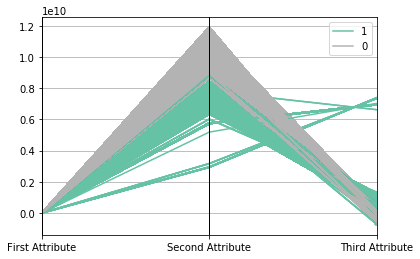

In [19]:
# Make the plot for SVD data 
parallel_coordinates(condensed_matSVD_data, 'kmeans', colormap=plt.get_cmap("Set2"))
plt.show()

## Interactive Parallel Coordinate Plots w/ Plotly API

In [20]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go 

In [21]:
plotly.tools.set_credentials_file(username='rachel_harvill', api_key='QGLYwKR1rHxWXKe0fiGu')

In [25]:
df = condensed_matSVD_data
first_max = df.loc[df['Second Attribute'].idxmax()]['Second Attribute']
second_max = df.loc[df['Third Attribute'].idxmax()]['Third Attribute']
third_max = df.loc[df['Third Attribute'].idxmax()]['First Attribute']
print('first_max= ', first_max, 'second_max= ', second_max, 'third_max', third_max)
data = [
    go.Parcoords(
        line = dict(color = df['kmeans'],colorscale = 'Jet',
                   showscale = True,
                   reversescale = True,
                   cmin = 0,
                   cmax = 1),
        dimensions = list([
            dict(range = [0,first_max],
                constraintrange = [4,8],
                label = 'Second Attribute', values = df['Second Attribute']),
            dict(range = [0,second_max],
                label = 'Third Attribute', values = df['Third Attribute']),
            dict(range = [0,third_max],
                label = 'First Attribute', values = df['First Attribute'])
        ])
    )
]

layout = go.Layout(
    plot_bgcolor = '#ffffff',
    paper_bgcolor = '#E5E5E5'
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'parcoords-advanced')

first_max=  11904879795.250679 second_max=  7382452374.28173 third_max 2578.0


C:\Users\rachh\Anaconda\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### Aggregated Heatmap

1. Split data into groups based on k-means cluster value (AKA which group they were grouped into)
2. Apply aggregation function (sum or average, we will use both to see difference in results) to all dimensions within that group
3. Plot aggregated values in heatmap

In [28]:
def group_data(df):
    grouped_data = df.groupby('kmeans')
    return grouped_data.mean()

In [29]:
condensed_matSVD_data.head()

,First Attribute,Second Attribute,Third Attribute,kmeans
0,0,8.432911e+09,8.128278e+08,1
1,1,8.432911e+09,8.128278e+08,1
2,2,8.432911e+09,8.128278e+08,1
3,3,8.432911e+09,8.128278e+08,1
4,4,8.432911e+09,8.128278e+08,1


In [30]:
#split data into clustered groups
groupedSVD_data = condensed_matSVD_data.groupby('kmeans')
#compute the sum for every column in the group 
sumsSVD = groupedSVD_data.mean()

In [31]:
sumsSVD

,First Attribute,Second Attribute,Third Attribute
kmeans,,,
0,4542.451350,1.033761e+10,-2.048955e+08
1,5562.421558,7.044432e+09,9.976636e+08


In [32]:
data = [go.Heatmap( z=sumsSVD.values.tolist(), 
                   y=['Persona 1', 'Persona 2'],
                   x=['First Attribute', 'Second Attribute', 'Third Attribute'
                     ],
                   colorscale='Viridis')]
plotly.offline.iplot(data, filename='pandas-heatmap')
py.iplot(data, filename = 'pandas-heatmap')

C:\Users\rachh\Anaconda\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [33]:
labSVDSum = group_data(svdLab_results) 


data = [go.Heatmap( z=labSVDSum.values.tolist(), 
                   y=['Persona 1', 'Persona 2'],
                   x=['First Attribute', 'Second Attribute', 'Third Attribute', 'Fourth Attribute'
                     ],
                   colorscale='Viridis')]
plotly.offline.iplot(data, filename='pandas-heatmap')
py.iplot(data, filename = 'pandas-heatmap')

C:\Users\rachh\Anaconda\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

